**This notebook is created to practice classification ml from textbook "Hand on ..."**

In [1]:
from sklearn.datasets import fetch_openml

In [16]:
# download dataset 
mnist = fetch_openml('mnist_784', version=1,as_frame=False)

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [17]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [18]:
X, y = mnist["data"], mnist["target"]

In [19]:
X.shape,y.shape

((70000, 784), (70000,))

In [12]:
mnist['url']

'https://www.openml.org/d/554'

In [25]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

In [20]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [21]:
#get first example and reshape for viewing as image 
some_digit = X[0]
some_digit_image = some_digit.reshape(28, 28)

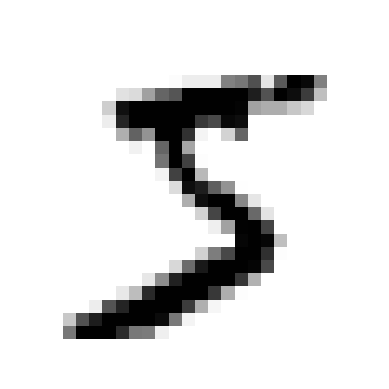

In [22]:
plt.imshow(some_digit_image, cmap = mpl.cm.binary, interpolation="nearest")
plt.axis("off")
plt.show()

In [23]:
y[0]

'5'

In [26]:
# convert from string to int
y = y.astype(np.uint8)

In [28]:
# all_data -> train,test
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

**Binay classification**

In [29]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

In [30]:
from sklearn.linear_model import SGDClassifier

In [31]:
#Stochastic Gradient Descent (SGD) 
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [32]:
sgd_clf.predict([some_digit])

array([ True])

In [33]:
from sklearn.model_selection import cross_val_score

In [34]:
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.95035, 0.96035, 0.9604 ])

In [35]:
from sklearn.base import BaseEstimator
class Never5Classifier(BaseEstimator):
  def fit(self, X, y=None):
    pass
  def predict(self, X):
    return np.zeros((len(X), 1), dtype=bool)

In [36]:
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.91125, 0.90855, 0.90915])

In [39]:
class WTFClassifier(BaseEstimator):
  def fit(self, X, y=None):
    pass
  def predict(self, X):
    return np.zeros((len(X), 1), dtype=bool) + 5963

In [40]:
WTF_clf = WTFClassifier()
cross_val_score(WTF_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0., 0., 0.])

In [41]:
from sklearn.model_selection import cross_val_predict

In [42]:
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [43]:
from sklearn.metrics import confusion_matrix

In [44]:
confusion_matrix(y_train_5, y_train_pred)

array([[53892,   687],
       [ 1891,  3530]])

In [45]:
y_train_perfect_predictions = y_train_5
confusion_matrix(y_train_5, y_train_perfect_predictions)

array([[54579,     0],
       [    0,  5421]])

In [49]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_train_5, y_train_pred),recall_score(y_train_5, y_train_pred)

(0.8370879772350012, 0.6511713705958311)

In [50]:
from sklearn.metrics import f1_score
f1_score(y_train_5, y_train_pred)

0.7325171197343846